In [1]:
from zipfile import ZipFile
import pandas as pd
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# https://www.kaggle.com/kimjihoo/coronavirusdataset
kaggle.api.authenticate()
kg_url='kimjihoo/coronavirusdataset'
files=['patient.csv','route.csv','time.csv']

In [3]:
for file in files:
    kaggle.api.dataset_download_file(kg_url,file,force=True, path='data')#force =Trure rewrites file if excist


In [4]:
df_patient = pd.read_csv('data/'+files[0])
df_route = pd.read_csv('data/'+files[1])
df_time = pd.read_csv('data/'+files[2])
#df_time =df_time.reset_index()

In [5]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               53 non-null     object
 1   time               53 non-null     int64 
 2   test               53 non-null     int64 
 3   negative           53 non-null     int64 
 4   confirmed          53 non-null     int64 
 5   released           53 non-null     int64 
 6   deceased           53 non-null     int64 
 7   Seoul              53 non-null     int64 
 8   Busan              53 non-null     int64 
 9   Daegu              53 non-null     int64 
 10  Incheon            53 non-null     int64 
 11  Gwangju            53 non-null     int64 
 12  Daejeon            53 non-null     int64 
 13  Ulsan              53 non-null     int64 
 14  Sejong             53 non-null     int64 
 15  Gyeonggi-do        53 non-null     int64 
 16  Gangwon-do         53 non-null     int64 
 17 

In [6]:
#df_time.rename(columns={'176':'Date'},inplace=True)
df_time['date']=pd.to_datetime(df_time['date'])

In [8]:
df_patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [10]:
df_route.head(1)

,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.44068


In [223]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 0 to 7512
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7513 non-null   int64  
 1   sex               662 non-null    object 
 2   birth_year        649 non-null    float64
 3   country           7513 non-null   object 
 4   region            421 non-null    object 
 5   disease           28 non-null     float64
 6   group             82 non-null     object 
 7   infection_reason  144 non-null    object 
 8   infection_order   35 non-null     float64
 9   infected_by       70 non-null     float64
 10  contact_number    50 non-null     float64
 11  confirmed_date    7513 non-null   object 
 12  released_date     55 non-null     object 
 13  deceased_date     36 non-null     object 
 14  state             7513 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 880.6+ KB


In [11]:
date_clm = ['confirmed_date','released_date','deceased_date']
for clm in date_clm:
    df_patient[clm]=pd.to_datetime(df_patient[clm])

In [12]:
df_patient['duration']=df_patient['released_date']-df_patient['confirmed_date']
df_patient['duration_death']=df_patient['deceased_date']-df_patient['confirmed_date']
df_patient['age'] =2019- df_patient['birth_year']

Text(0.5, 0, 'age')

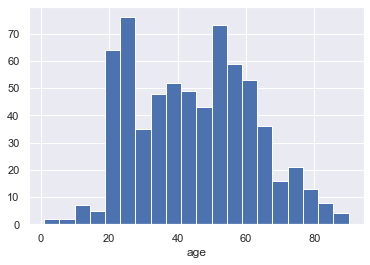

In [13]:
df_patient['age'].hist(bins=20)
plt.xlabel('age')

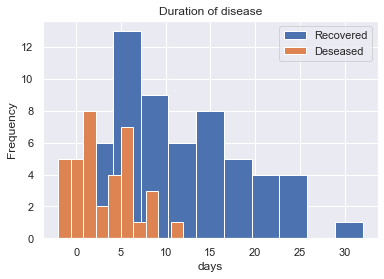

In [14]:
df_patient['duration'].astype('timedelta64[D]').plot.hist(label='Recovered')
df_patient['duration_death'].astype('timedelta64[D]').plot.hist(label='Deseased')
plt.xlabel('days')
plt.legend()
plt.title('Duration of disease')
plt.show()

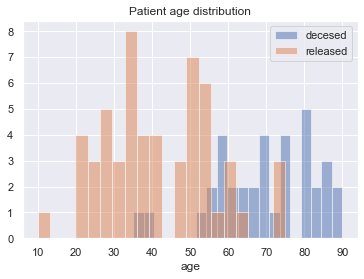

In [15]:
df_patient[df_patient['state']=='deceased']['age'].hist(bins=20,alpha=0.5,label='decesed')
df_patient[df_patient['state']=='released']['age'].hist(bins=20,alpha=0.5,label='released')
plt.xlabel('age')
plt.title('Patient age distribution')
plt.legend();

In [16]:
df_time=df_time.set_index('date')


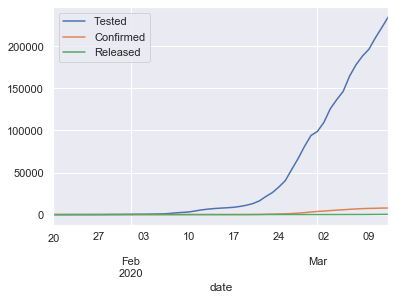

In [17]:
df_time['test'].plot(label='Tested')
df_time['confirmed'].plot(label='Confirmed')
df_time['released'].plot(label='Released')
plt.legend()


In [18]:
import plotly.express as px

In [19]:
df_time.head()

,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,Incheon,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
date,,,,,,,,,,,,,,,,,,,,,
2020-01-20,16,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-21,16,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-22,16,4,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,16,22,21,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,16,27,25,2,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [23]:
fig = px.line(title='Cases')
fig.add_scatter(x=df_time.reset_index()['date'], y=df_time.reset_index()['confirmed'], mode='lines',name='Confiermed')
fig.add_scatter(x=df_time.reset_index()['date'], y=df_time.reset_index()['released'], mode='lines', name="Released")
fig.add_scatter(x=df_time.reset_index()['date'], y=df_time.reset_index()['deceased'], mode='lines', name="Deceased")
fig.show()

In [24]:
fig = px.histogram(df_patient, x='age', range_x=[0,100], range_y=[0,30])
fig.show()

In [25]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   patient_id        7869 non-null   int64          
 1   sex               679 non-null    object         
 2   birth_year        666 non-null    float64        
 3   country           7869 non-null   object         
 4   region            437 non-null    object         
 5   disease           28 non-null     float64        
 6   group             86 non-null     object         
 7   infection_reason  154 non-null    object         
 8   infection_order   36 non-null     float64        
 9   infected_by       70 non-null     float64        
 10  contact_number    53 non-null     float64        
 11  confirmed_date    7869 non-null   datetime64[ns] 
 12  released_date     56 non-null     datetime64[ns] 
 13  deceased_date     36 non-null     datetime64[ns] 
 14  state   